# Laboration 1 i Maskininlärning:

## **Disease prediction**

### __Introduktion / Problemställning:__

I denna laboration var syftet att förutsäga förekomsten av hjärt- kärlsjukdom (Cradio Vascular Disease - "CVD"), utifrån data baserad på en studie gjord på 70000 patienter och 13 kategorier. Dessa 11 kategorier eller features var av demografisk, klinisk och biometrisk karaktär. Där den undersökande kategorin cardio (hjärt-kärlsjukdom), där 1 indikerar positiv och 0 negativ.   
  
Utmaningen låg i att undersöak datasettet, visualiser och hitta sammaband, göra feature engineering, testa och utvärdera olika maksininlärningsmodeller för hitta en så stabil modell som möjligt för att förutspå.... med hög precision och recall kan identifiera patienter med hjärt-kärlsjukdom, eftersom ett missat positivt fall (falskt negativt) kan få allvarliga konsekvenser. 

### Relevanta teoretisk modeller som använts är:

Medicinska observationer såsom BMI och Blodtryck:

**BMI:** Ett mått på kroppsvikt i relation till längd, beräknat som:

$$
\text{BMI} = \frac{\text{Vikt (kg)}}{(\text{Längd (cm)}/100)^2}
$$

källa https://en.wikipedia.org/wiki/Body_mass_index
**Blodtryck:**



**Logistisk Regression:**

En statistisk modell för binär klassificering som estimerar sannolikheten att en observation tillhör en viss klass. Sannolikheten $P(y=1 \mid X)$ ges av:

$$ 
P(y=1 \mid X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \dots + \beta_p x_p)}}
$$

**-Regularisering:**
En teknik för att minska överanpassning genom att lägga till en straffterm till förlustfunktionen. För att minska varians men öka bias enligt bias_variance-trade-off.

Där **L1-regularisering:** $\text{Penalty} = \lambda \sum_{i} |\beta_i|$ och **L2-regularisering:** $\text{Penalty} = \lambda \sum_{i} \beta_i^2$ 


Korsvaldering och generalisering
Ensemble

Är entropi och GInin-index samma sak ellEntropi och Gini-index
Bagging och variansreducering och majority voting


### Initial EDA av "cardio_train.csv"-dataset:



In [72]:
# Importera lämplig bibliotek för EDA och visualisering.
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [73]:
# Läs in CSV-filen med lämplig separator för semi_kolon.
df = pd.read_csv("/Users/paraugustsson/Machine-learning-AI24-1/cardio_train.csv", sep=";")

# Kopierar orignal-df för vidare undrsökning med lämpligt namn. 
df_cardio = df

In [74]:
df_cardio.head()
# df_cardio.head(25)
# df_cardio.tail(25)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [75]:
# Kolla vilka datatyper som finns i df och om det finns några NaN-värden i df?
df_cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [76]:
# Kolla mer ingende på datasettet: min, max, kvartiler, medelvärde och standardavvikelse.
df_cardio.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


### Analys av initial EDA: 
Vid en överblick av datasettets identifierades kolumnen “ID” som ett unikt nummer per undersökningsobjekt. Eftersom “ID” inte bidrar med relevant data för om någon har hjärt kärlsjukdom så togs den bort. Även att kolimenne ålder är skriven i dagar....Övrigt är det en del negativa värden på kolumnerna som ap_hi och ap_som är blodtrycksvärden och de kan inte vara negativa (https://en.wikipedia.org/wiki/Blood_pressure), vilket i det här indikerar på extremvärden. Även att kolumnen gender visar övervikt mot 1 indikerar att ett kön kan vara överrepresenterat. De kolumner som sen är postiva och negativa där se rvi att den...

In [77]:
# Ta bort kolumnen "id" för den är inte relevant för udnersökningen.
df_cardio = df_cardio.drop(columns=["id"], axis= 1 )

In [78]:
# Skapa en ny kolumn med kvinor och män
df_cardio["gender_label"] = df_cardio["gender"].map({1: "Female", 2: "Male"})
df_cardio.head()

# Skapa en ny kolumn med ålder i år
df_cardio["age_years"] = (df_cardio["age"] / 365).round().astype("int")

# Ändra värdena i kolumnen cardio till Yes och No
df_cardio["CVD"] = df_cardio["cardio"].map({1: 'Yes', 0: 'No'}) # kodhjälp" prompt"XX"

# Kolla andel kvinnor och män i datasettet
df_cardio.gender.value_counts()

# Visa andelen kvinnor och män i procent
gender_share = df_cardio.gender_label.value_counts(normalize=True).round(2) * 100
print(f"Share of women and men in the data set: \n{gender_share}")


Share of women and men in the data set: 
gender_label
Female    65.0
Male      35.0
Name: proportion, dtype: float64


Det är nästa dubbelt så många kvinor som män i datasettet. 

# EDA

### Frågetsällningar:
- Hur många är sjuka respektive friska i hjärt- kärlsjukdom?
- Hur ser åldersfördelningen ut? 
- Hur stor andel har normala, över normala och långt över normala kolesterolvärden?
- Hur stor andel röker?
- Hur ser viktfördelningen ut? 
- Hur ser längdfördelningen ut? 
- Hur stor andel av kvinnor respektive män har hjärt-kärlsjukdom?

In [79]:
df_cardio.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio', 'gender_label',
       'age_years', 'CVD'],
      dtype='object')

/var/folders/1z/yqj81jcd0zb38n2307mt0p480000gn/T/ipykernel_2169/60760473.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="CVD", data=df_cardio, palette="Set2", ax=ax[0, 0])


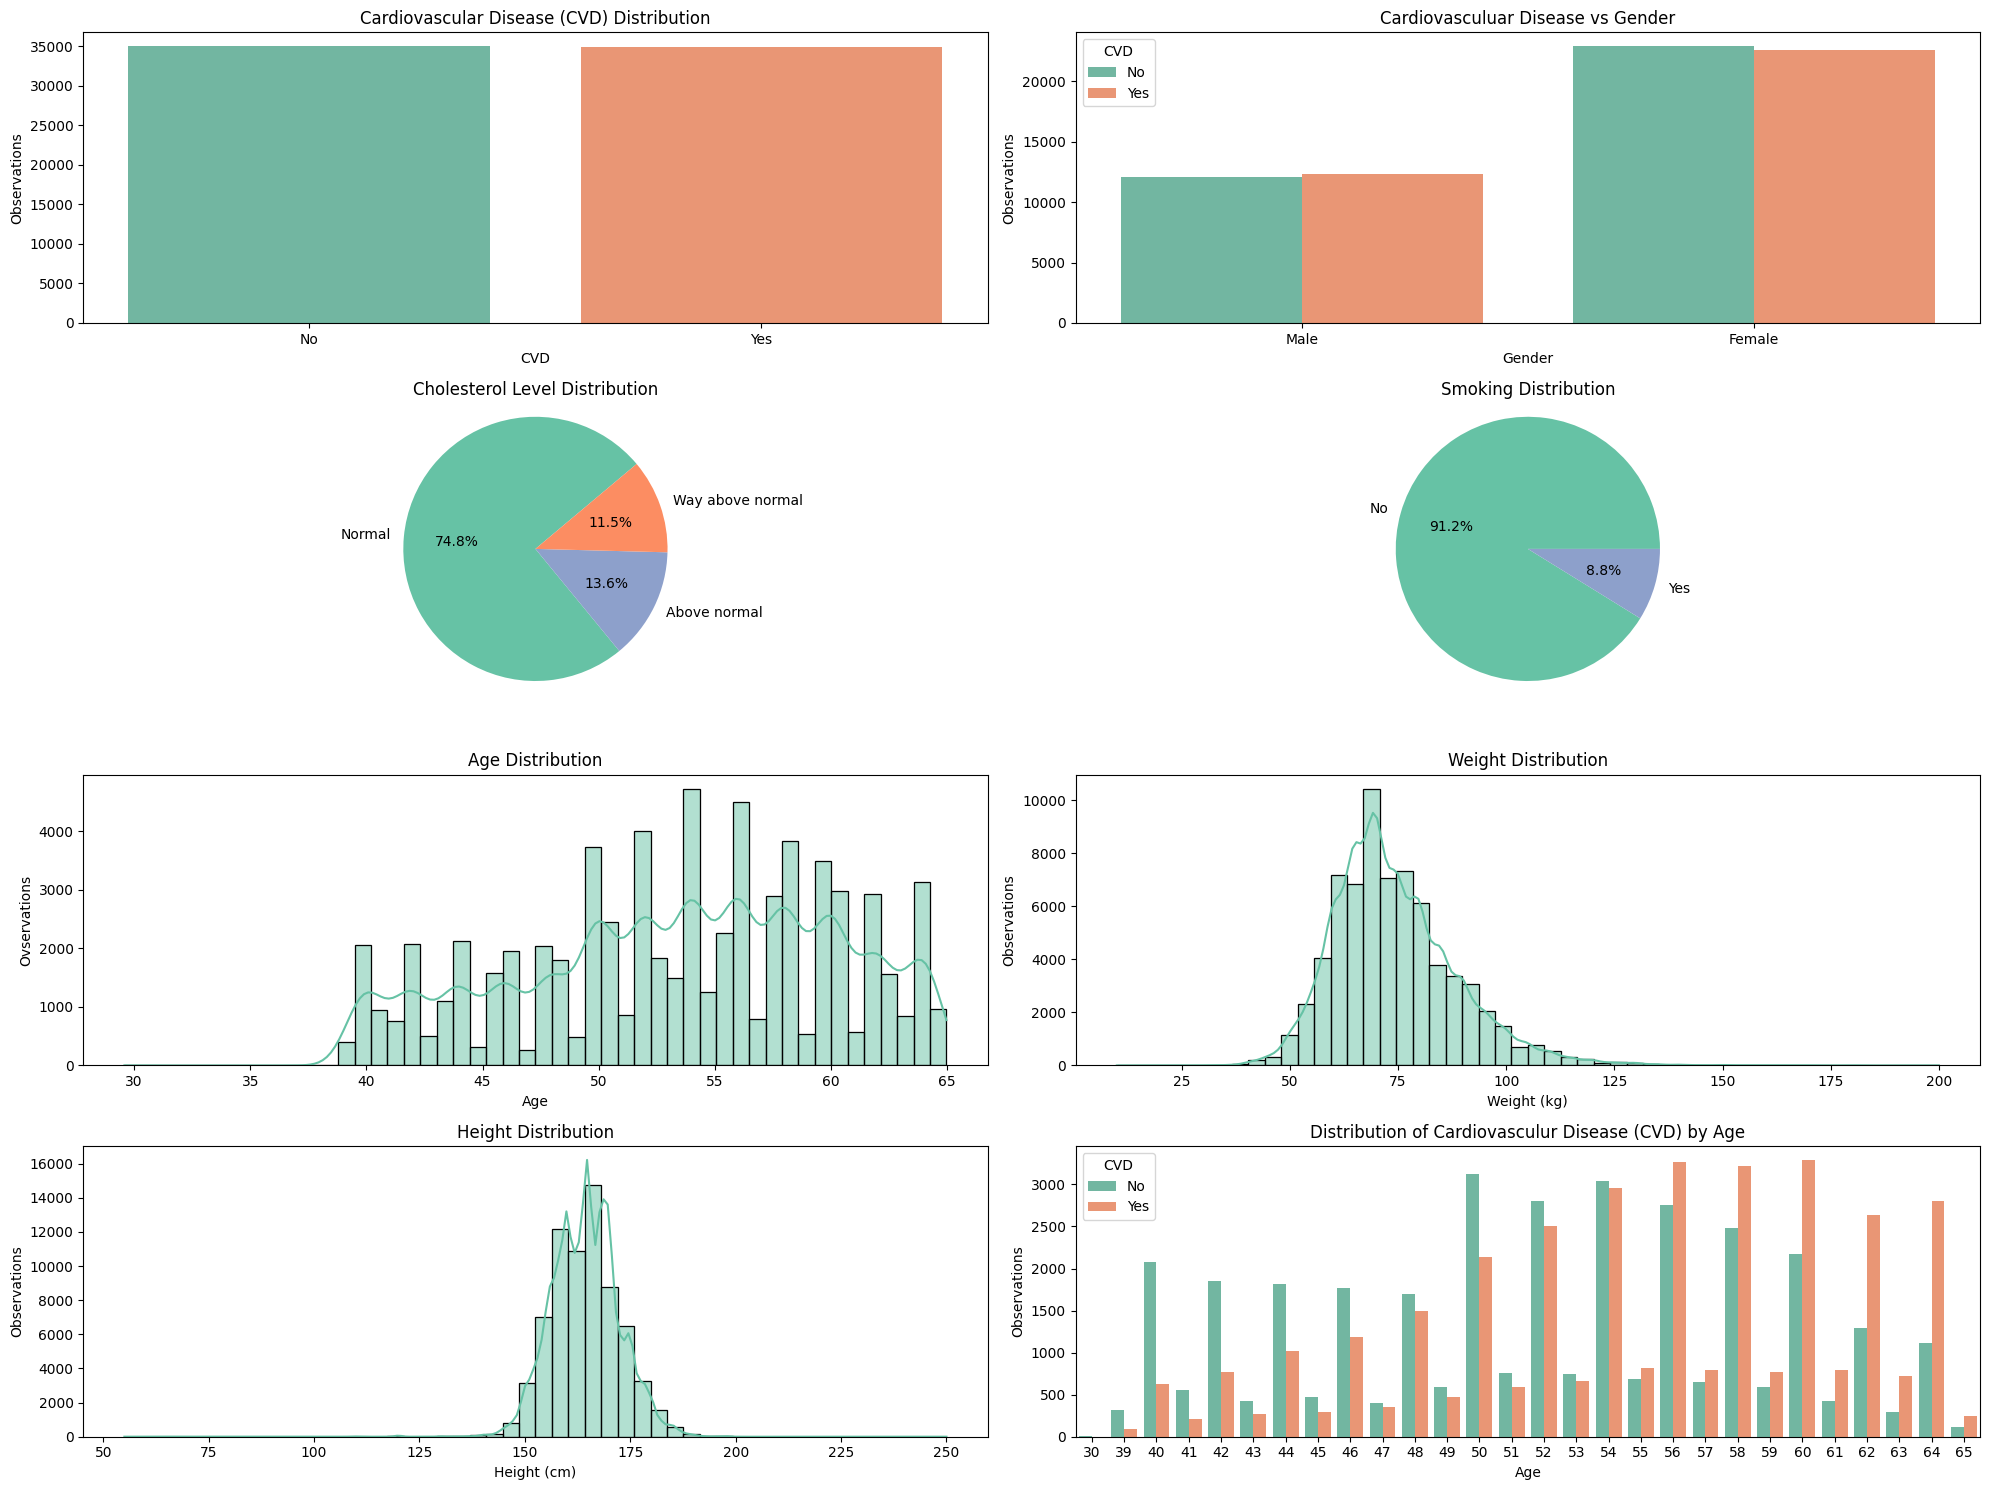

In [80]:
# skapa subplots för att visa flera grafer samtidigt
fig, ax = plt.subplots(4, 2, figsize=(20, 15))

# Tar med min countplot för Cardioascular Disease sen innan:
sns.countplot(x="CVD", data=df_cardio, palette="Set2", ax=ax[0, 0])
ax[0, 0].set_title("Cardiovascular Disease (CVD) Distribution")
ax[0, 0].set_xlabel("CVD")
ax[0, 0].set_ylabel("Observations") 

# Lägg till en countplot för att se hur många som har CVD jämfört med kön:
sns.countplot(x="gender_label", data=df_cardio, hue="CVD", palette="Set2", ax=ax[0, 1])
ax[0, 1].set_title("Cardiovasculuar Disease vs Gender")
ax[0, 1].set_xlabel("Gender")
ax[0, 1].set_ylabel("Observations")

# Lägg till min pie-chart över kolesterolnivåer:
# Räkna antalet observationer i varje kategori för kolesterol och sertera dem efter index.
cholesterol_counts = df_cardio["cholesterol"].value_counts().sort_index()
cholesterol_labels = ["Normal", "Above normal", "Way above normal"]
ax[1, 0].pie(cholesterol_counts, labels=cholesterol_labels, autopct="%1.1f%%", startangle=40, colors=["#66c2a5", "#8da0cb", "#fc8d62",])
ax[1, 0].axis("equal")
ax[1, 0].set_title("Cholesterol Level Distribution")

# Lägg till en pie-chart för att se hur många som röker:
# Mappa om 0 och 1 till No och Yes för att göra det mer läsbart
smoke_counts = df_cardio["smoke"].value_counts()
smoke_labels = smoke_counts.index.map({0: "No", 1: "Yes"})
ax[1, 1].pie(smoke_counts, labels=smoke_labels, autopct="%1.1f%%", colors=["#66c2a5", "#8da0cb", "#fc8d62",])
ax[1,1].axis("equal")
ax[1, 1].set_title("Smoking Distribution")

# Lägg till en histogram för att se fördelningen av ålder:
# Dela ålder med 365 för att få ålder i år
sns.histplot(df_cardio["age"]/365, bins=50, kde=True, color="#66c2a5", ax=ax[2, 0])
ax[2, 0].set_title("Age Distribution")
ax[2, 0].set_xlabel("Age")
ax[2, 0].set_ylabel("Ovservations")

# Lägg till en histogram för att se fördelningen av vikt i datasettet:
sns.histplot(df_cardio["weight"], kde=True, bins=50, color="#66c2a5", ax=ax[2, 1])
ax[2, 1].set_title("Weight Distribution")
ax[2, 1].set_xlabel("Weight (kg)")
ax[2, 1].set_ylabel("Observations")

# lägg till ett histogram för att se fördelningen av längd i datasettet:
sns.histplot(df_cardio["height"], kde=True, bins=50, color="#66c2a5", ax=ax[3, 0])
ax[3, 0].set_title("Height Distribution")
ax[3, 0].set_xlabel("Height (cm)")
ax[3, 0].set_ylabel("Observations")

sns.countplot(x="age_years", hue="CVD", data=df_cardio, palette="Set2")
ax[3,1].set_title("Distribution of Cardiovasculur Disease (CVD) by Age")
ax[3,1].set_xlabel("Age")
ax[3,1].set_ylabel("Observations")

plt.tight_layout()
plt.show()

### **Analys frågeställningar:**

Liknande fördelning mellan friska och sjuka i hjärt kärlsjukdom. Nästan dubbelt så många kvinnor som män i undersökningen, även här liknande fördelningar mellan sjuka och friska i hjärt- kärlsjukdom. Försumbara skillnader mellan könen där kvinnor viktar lite mot friska och män lite mot sjuka. Övervägande majoritets som varken röker eller lider av höga kolesterolvärden. Vilka kan vara bidragande faktorer till hjärt- kärlsjukdom. Åldersfördelningen är viktat mot övre medelåldern och uppåt. Viktfördelning eller längd sticker inte heller ut med tanke på att det är dubbelt så många kvinnor kommer medelvikt och längd påverkas till det lägre än om fördelningen av könen varit lika.

### Feature engineering BMI:

In [81]:
# Skapa en ny kolumn för BMI baserat på formel för BMI = vikt / (längd i meter)^2
df_cardio["BMI"] = round(df_cardio["weight"] / ((df_cardio["height"] / 100) ** 2), 2)

# Ta bort orimliga värden / outliers
df_cardio = df_cardio.drop(df_cardio[(df_cardio["BMI"] > 80) | (df_cardio["BMI"] < 15)].index, axis=0)

In [82]:
# Defina vilkoren för BMI-gränserna. 
# Kodsnutt från https://medium.com/@amit25173/how-numpy-select-works-f11ed0de629b
conditions = [
    (df_cardio["BMI"] >= 18.5) & (df_cardio["BMI"] < 25),
    (df_cardio["BMI"] >= 25) & (df_cardio["BMI"] < 30),
    (df_cardio["BMI"] >= 30) & (df_cardio["BMI"] < 35),
    (df_cardio["BMI"] >= 35) & (df_cardio["BMI"] < 40),
    (df_cardio["BMI"] >= 40)
]

# Definiera de kategorier som vilkoren skall tilldelas  
categories = [
            "Normal range", 
            "Overweight", 
            "Obese (class I)", 
            "Obese (class II)", 
            "Obese (class III)"
]

# Använd np.select för att skapa en ny kolumn i df_cardio och tilldela kategorier baserat på villkoren
df_cardio["BMI_Cat"] = np.select(conditions, categories, default="Out of range") 

In [83]:
df_cardio["BMI"].value_counts()

BMI
23.88    1157
24.22     673
23.44     652
25.71     451
23.53     391
         ... 
42.16       1
44.46       1
45.48       1
17.10       1
50.47       1
Name: count, Length: 2305, dtype: int64

In [84]:
df_cardio["BMI_Cat"].value_counts()

BMI_Cat
Normal range         25656
Overweight           25175
Obese (class I)      12242
Obese (class II)      4397
Obese (class III)     1853
Out of range           617
Name: count, dtype: int64

Gränserna för kategorierna drogs baserat på dels wikepdias (https://en.wikipedia.org/wiki/Body_mass_index) gräsner för BMI men även från livsmedelsverkets hemsida https://www.livsmedelsverket.se/matvanor-halsa--miljo/sjukdomar-allergier-och-halsa/overvikt-och-fetma.

## Feature engineering blodtryck:

In [85]:
# Ta bort negativa eller orimligt låga / höga systoliska/diastoliska värden  
df_cardio = df_cardio[(df_cardio['ap_hi'] >= 80) & (df_cardio['ap_hi'] <= 250)]
df_cardio = df_cardio[(df_cardio['ap_lo'] >= 50) & (df_cardio['ap_lo'] <= 200)]

# Ta bort om diastoliskt > systoliskt
df_cardio = df_cardio[df_cardio['ap_lo'] <= df_cardio['ap_hi']]

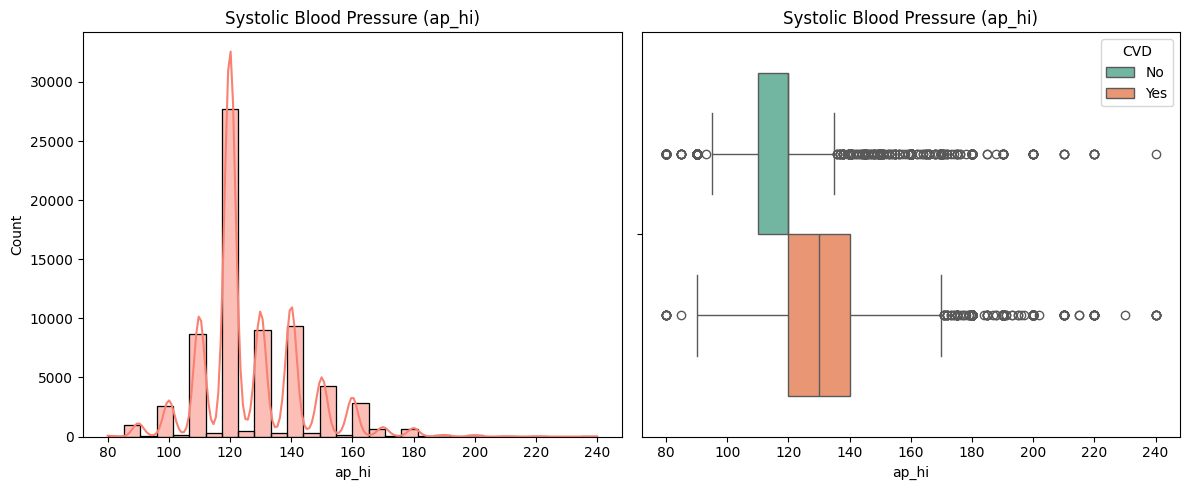

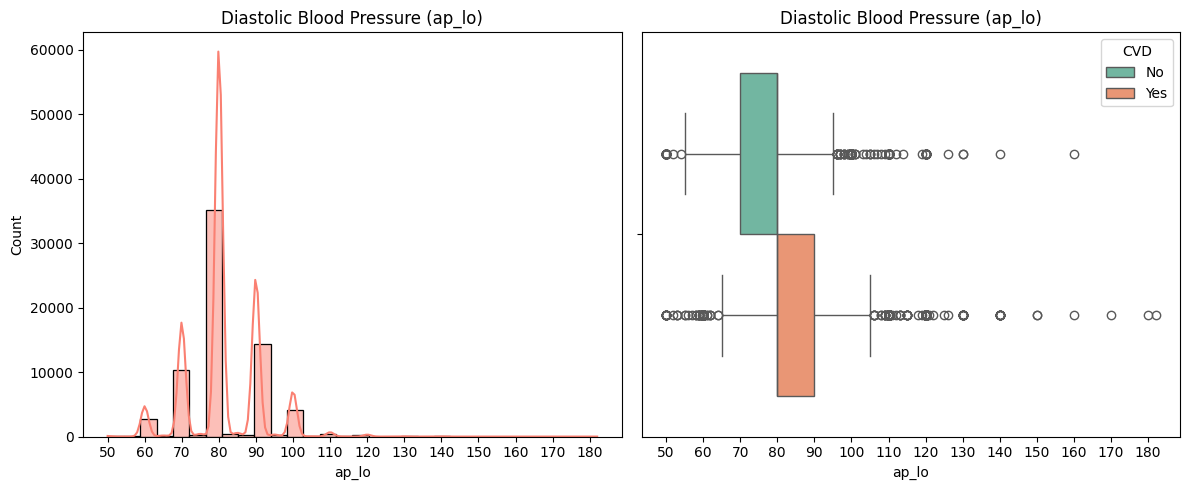

In [86]:
# Mina första hist- och boxplot-grafer blev inte överskådliga. Bad därför Chat-GPT om hjälp. 
# Prompt: “Hur justerar jag x-axelns skalor så mina box- och histplot grafer blir mer överskådliga?
from matplotlib.ticker import ScalarFormatter

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plotta systoliskt tryck
sns.histplot(data=df_cardio, x="ap_hi", kde=True, ax=axes[0], bins=30, color="salmon")
axes[0].set_title("Systolic Blood Pressure (ap_hi)")

# Tvinga fram plain notation och ställ in egna ticklabels
axes[0].xaxis.set_major_formatter(ScalarFormatter())
axes[0].xaxis.set_major_formatter(ScalarFormatter())
axes[0].set_xticks(np.arange(df_cardio["ap_hi"].min(), df_cardio["ap_hi"].max()+1, 20))

sns.boxplot(data=df_cardio, x="ap_hi", ax=axes[1], hue="CVD", palette="Set2")
axes[1].set_title("Systolic Blood Pressure (ap_hi)")

axes[1].xaxis.set_major_formatter(ScalarFormatter()) 
axes[1].xaxis.set_major_formatter(ScalarFormatter())
axes[1].set_xticks(np.arange(df_cardio["ap_hi"].min(), df_cardio["ap_hi"].max()+1, 20))

plt.tight_layout()
plt.show()

# Plotta diastoliskt tryck
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data=df_cardio, x="ap_lo", kde=True, ax=axes[0], bins=30, color="salmon")
axes[0].set_title("Diastolic Blood Pressure (ap_lo)")
axes[0].xaxis.set_major_formatter(ScalarFormatter())
axes[0].xaxis.set_major_formatter(ScalarFormatter())
axes[0].set_xticks(np.arange(df_cardio["ap_lo"].min(), df_cardio["ap_lo"].max()+1, 10))

sns.boxplot(data=df_cardio, x="ap_lo", ax=axes[1], hue= "CVD", palette="Set2")
axes[1].set_title("Diastolic Blood Pressure (ap_lo)")
axes[1].xaxis.set_major_formatter(ScalarFormatter())
axes[1].xaxis.set_major_formatter(ScalarFormatter())
axes[1].set_xticks(np.arange(df_cardio["ap_lo"].min(), df_cardio["ap_lo"].max()+1, 10))

plt.tight_layout()
plt.show()

In [87]:
# Ta bort fler samples med orimliga systoliska/diastoliska värden baserat på graferna ovan.
df_cardio = df_cardio[(df_cardio["ap_hi"] >= 90) & (df_cardio["ap_hi"] <= 200)]
df_cardio = df_cardio[(df_cardio["ap_lo"] >= 60) & (df_cardio["ap_lo"] <= 110)]

In [88]:
# skapa en ny kolumn för blodtrycks kategorier
conditions = [
    (df_cardio["ap_hi"] > 180) | (df_cardio["ap_lo"] > 120),
    (df_cardio["ap_hi"] >= 140) | (df_cardio["ap_lo"] >= 90),
    ((df_cardio["ap_hi"] >= 130) & (df_cardio["ap_hi"] <= 139)) | ((df_cardio["ap_lo"] >= 80) & (df_cardio["ap_lo"] <= 89)),
    ((df_cardio["ap_hi"] >= 120) & (df_cardio["ap_hi"] <= 129)) & (df_cardio["ap_lo"] < 80),
    (df_cardio["ap_hi"] < 120) & (df_cardio["ap_lo"] < 80)
]

categories = [
    "Hypertensive Crisis",
    "Hypertension Stage 2",
    "Hypertension Stage 1",
    "Elevated",
    "Normal"
]

df_cardio["bp_category"] = np.select(conditions, categories, default="Out of range")

Valet av gränsdragning av de olika kriterierna för högt blodtryck tog genom uppgifter från https://www.healthline.com/health/high-blood-pressure-hypertension#causes och https://kunskapsstodforvardgivare.se/omraden/hjart--och-karlsjukdomar/behandlingsprogram/akut-hjartsjukvard/ovrig-akut-hjartsjukvard/akut-hypertoni. Samt genom att studera outliers genom histogram och boxplots över kolumnerna: ”ap_hi” och ”ap_lo”.  

### Visualiseirg andel sjukdomar:

In [89]:
# tilldela kategorier för kolumnen "cholesterol" 
conditions = [
    (df_cardio["cholesterol"] == 1),
    (df_cardio["cholesterol"] == 2),
    (df_cardio["cholesterol"] == 3)
]
categories = [
    "Normal",
    "Above normal",
    "Way above normal"
]

df_cardio["cholesterol_cat"] = np.select(conditions, categories, default="Out of range")


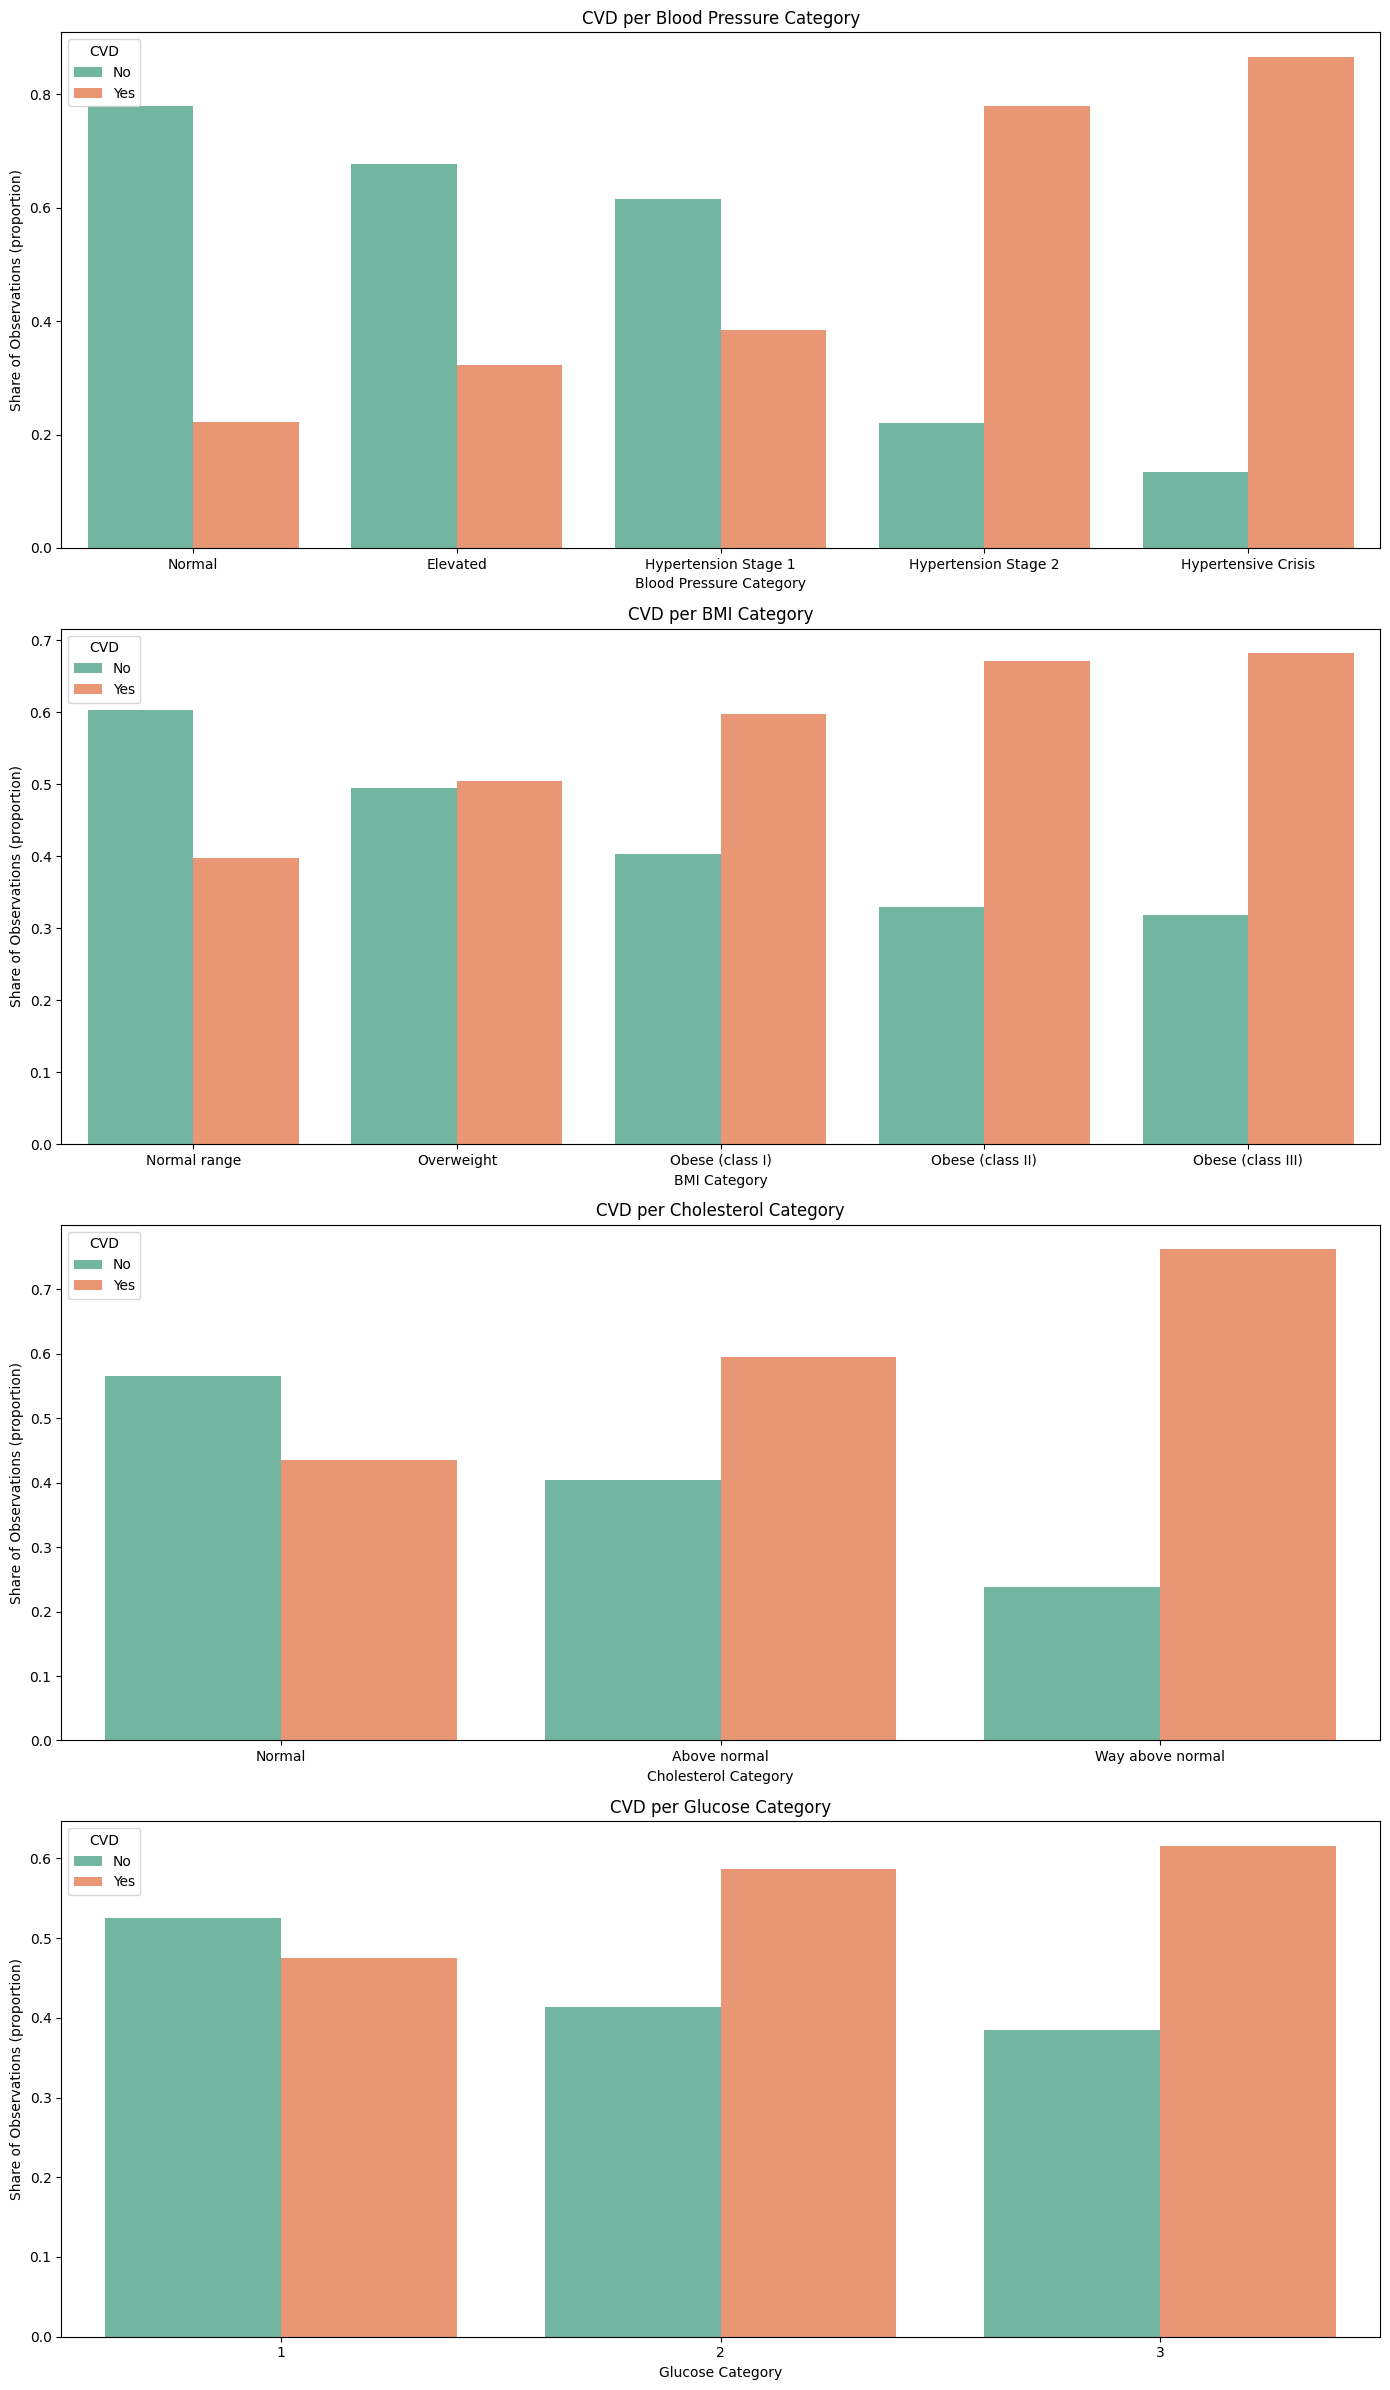

In [ ]:
fig, axes = plt.subplots(4, 1, figsize=(14, 24))

# Ändra ordning för mer överskådlighet
order_bp = ["Normal", "Elevated", "Hypertension Stage 1", "Hypertension Stage 2", "Hypertensive Crisis"]
order_BMI = ["Normal range", "Overweight", "Obese (class I)", "Obese (class II)", "Obese (class III)"]
order_chol = ["Normal", "Above normal", "Way above normal"]
order_gluc = ["Normal", "Above normal", "Way above normal"]



# Subplot 1: Räkna ut andel sjuka per blodtryckskategori 
grouped = df_cardio.groupby(["bp_category", "CVD"]).size().reset_index(name="count")
totals = grouped.groupby("bp_category")["count"].transform("sum") # Kodhjälp: https://stackoverflow.com/questions/23377108/pandas-percentage-of-total-with-groupby
grouped["proportion"] = grouped["count"] / totals

sns.barplot(
    x="bp_category", 
    y="proportion", 
    hue="CVD", 
    data=grouped, 
    palette="Set2", # Färg-palett: https://seaborn.pydata.org/tutorial/color_palettes.html
    ax=axes[0],
    order=order_bp
)
axes[0].set_title("CVD per Blood Pressure Category")
axes[0].set_xlabel("Blood Pressure Category")
axes[0].set_ylabel("Share of Observations (proportion)")

# Subplot 2: Räkna ut andel sjuka per BMI
grouped_bmi = df_cardio.groupby(["BMI_Cat", "CVD"]).size().reset_index(name="count")
totals_bmi = grouped_bmi.groupby("BMI_Cat")["count"].transform("sum")
grouped_bmi["proportion"] = grouped_bmi["count"] / totals_bmi
sns.barplot(
    x="BMI_Cat", 
    y="proportion", 
    hue="CVD", 
    data=grouped_bmi, 
    palette="Set2", 
    ax=axes[1],
    order=order_BMI
)
axes[1].set_title("CVD per BMI Category")
axes[1].set_xlabel("BMI Category")
axes[1].set_ylabel("Share of Observations (proportion)")

# Subplot 3: Räkna ut andel sjuka per kolesterolnivå
grouped_chol = df_cardio.groupby(["cholesterol_cat", "CVD"]).size().reset_index(name="count")
totals_chol = grouped_chol.groupby("cholesterol_cat")["count"].transform("sum")
grouped_chol["proportion"] = grouped_chol["count"] / totals_chol
sns.barplot(
    x="cholesterol_cat", 
    y="proportion", 
    hue="CVD", 
    data=grouped_chol, 
    palette="Set2", 
    ax=axes[2],
    order=order_chol
)
axes[2].set_title("CVD per Cholesterol Category")
axes[2].set_xlabel("Cholesterol Category")
axes[2].set_ylabel("Share of Observations (proportion)")

# Subplot 4: Räkna ut andel sjuka per gluykoshalt
grouped_glucose = df_cardio.groupby(["gluc", "CVD"]).size().reset_index(name="count")
totals_glucose = grouped_glucose.groupby("gluc")["count"].transform("sum")
grouped_glucose["proportion"] = grouped_glucose["count"] / totals_glucose
sns.barplot(
    x="gluc", 
    y="proportion", 
    hue="CVD", 
    data=grouped_glucose, 
    palette="Set2", 
    ax=axes[3]
)
axes[3].set_title("CVD per Glucose Category")
axes[3].set_xlabel("Glucose Category")
axes[3].set_ylabel("Share of Observations (proportion)")    

plt.tight_layout()
plt.show()

Abalys av visualiseriong andelen sjukdomar är att det finns högre andelar av undrsökningsobjekt som är sjuka i hjärt -kärlsjukdom och som också har problem med för högt BMI, Blodtrtyck och Kolesterol. På ålder kan vi se att andelen hjärtsjuka ökar ju lämgre upp i åldern undersökninghsobjekten kommer. Korrelation finns på de flesta här men hur starka är dem?

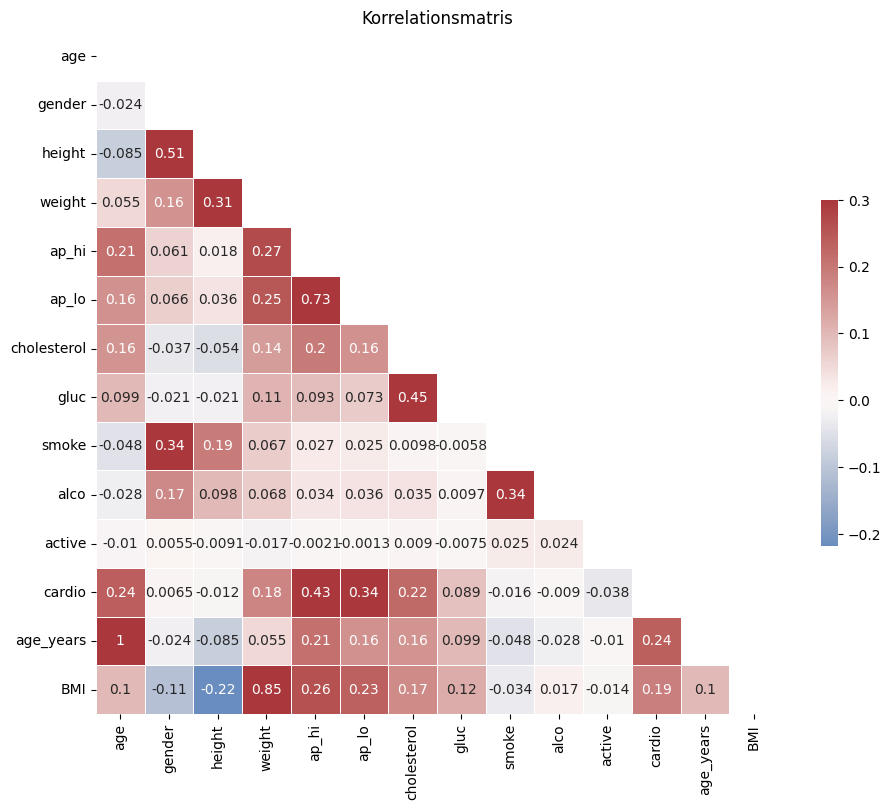

In [64]:
# Skapa en korrelationsmatris för att se sambandet mellan olika variabler i datasettet
# Kodhjälp: https://seaborn.pydata.org/examples/many_pairwise_correlations.html
corr = df_cardio.select_dtypes(include=[np.number]).corr()

# Skapa en mask för att dölja den övre triangeln av korrelationsmatrisen
mask = np.triu(np.ones_like(corr, dtype=bool))

# Ställ in stil och storlek på figuren
fig, ax = plt.subplots(figsize=(11, 9))

cmap = sns.color_palette("vlag", as_cmap=True)

# Skapa en värmekarta för att visa korrelationerna
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Korrelationsmatris')
plt.show()

Starkast positiv korrelation har vikt och BMI och motsatt så har längd och BMI starkast negativ korrelation. Men för hjärt- kärlsjukdom ("cardio") så har blodtryck den strakst postiva korrelationen på och speciellt det systoliska ("ap_hi"). Även glucose och ålder har en viss korrelation.   

### Skapa 2 dataset för one hot encoding 

In [65]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [66]:
df_cardio.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio', 'gender_label',
       'age_years', 'CVD', 'BMI', 'BMI_Cat', 'bp_category', 'cholesterol_cat'],
      dtype='object')

In [90]:
# 1) How many “Out of range” rows are there?
outliers = df_cardio[df_cardio["BMI_Cat"] == "Out of range"]
print("Count of BMI outliers:", len(outliers))

# 2) Inspect their BMI (and maybe weight & height)
print(outliers[["weight", "height", "BMI", "BMI_Cat"]].head(10))

# 3) Get a quick summary of those BMIs
print(outliers["BMI"].describe())

Count of BMI outliers: 598
      weight  height    BMI       BMI_Cat
23      45.0     156  18.49  Out of range
107     48.0     164  17.85  Out of range
108     54.0     174  17.84  Out of range
187     53.0     175  17.31  Out of range
432     47.0     165  17.26  Out of range
485     52.0     172  17.58  Out of range
503     60.0     182  18.11  Out of range
626     47.0     168  16.65  Out of range
1039    47.0     162  17.91  Out of range
1067    47.0     160  18.36  Out of range
count    598.000000
mean      17.519732
std        0.807262
min       15.010000
25%       17.047500
50%       17.720000
75%       18.180000
max       18.490000
Name: BMI, dtype: float64


### Skapa två dataset och gör one-hot encoding på dessa:

In [67]:
# Skapa en kopia av df_cardio för att inte påverka originalet
df_copy = df_cardio.copy()

# Dataset 1: Ta bort följande features: ap_hi, ap_lo, height, weight, BMI plus de jag själv skapat
df1 = df_copy.drop(columns=["ap_hi", "ap_lo", "height", "weight", "BMI", "gender_label", "CVD", "age_years", "cholesterol_cat"])

# Gör one-hot encoding på BMI-kategori, blodtryckskategori och kön
df1 = pd.get_dummies(df1, columns=["BMI_Cat", "bp_category", "gender"])

# Dataset 2: Ta bort följande features: BMI-kategori, blodtryckskategori, height, weight
df2 = df_copy.drop(columns=["BMI_Cat", "bp_category", "height", "weight", "gender_label", "CVD", "age_years", "cholesterol_cat"])

# Gör one-hot encoding på kön
df2 = pd.get_dummies(df2, columns=["gender"])

# Visa de första raderna för att verifiera
print("Dataset 1:")
print(df1.head())

Dataset 1:
     age  cholesterol  gluc  smoke  alco  active  cardio  \
0  18393            1     1      0     0       1       0   
1  20228            3     1      0     0       1       1   
2  18857            3     1      0     0       0       1   
3  17623            1     1      0     0       1       1   
4  17474            1     1      0     0       0       0   

   BMI_Cat_Normal range  BMI_Cat_Obese (class I)  BMI_Cat_Obese (class II)  \
0                  True                    False                     False   
1                 False                     True                     False   
2                  True                    False                     False   
3                 False                    False                     False   
4                  True                    False                     False   

   BMI_Cat_Obese (class III)  BMI_Cat_Out of range  BMI_Cat_Overweight  \
0                      False                 False               False   
1          

In [68]:
print("\nDataset 2:")
print(df2.head())


Dataset 2:
     age  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  active  cardio    BMI  \
0  18393    110     80            1     1      0     0       1       0  21.97   
1  20228    140     90            3     1      0     0       1       1  34.93   
2  18857    130     70            3     1      0     0       0       1  23.51   
3  17623    150    100            1     1      0     0       1       1  28.71   
4  17474    100     60            1     1      0     0       0       0  23.01   

   gender_1  gender_2  
0     False      True  
1      True     False  
2      True     False  
3     False      True  
4      True     False  


###  Kör train, validation och test på data df1 och df2  

In [69]:
# gör train test split för att dela upp datan i tränings- och testset
from sklearn.model_selection import train_test_split    

# Sätt X och y för datset1
X1 = df1.drop(columns=["cardio"], axis=1)
y1 = df1["cardio"]

# Sätt X och y för datset2
X2 = df2.drop(columns=["cardio"], axis=1)
y2 = df2["cardio"]

# Dela upp df1 i tränings- och testset
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=42)

# Dela upp df2 i tränings- och testset
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42)

# Dela upp testsetet i validerings- och testset för df1 i 70 / 30
X_val1, X_test1, y_val1, y_test1 = train_test_split(X_test1, y_test1, test_size=0.3, random_state=42)

# Dela upp testsetet i validerings- och testset för df2 i 70 / 30
X_val2, X_test2, y_val2, y_test2 = train_test_split(X_test2, y_test2, test_size=0.3, random_state=42)

# Kör X_train1 och y_train1 och X_train2 och y_train2 för att se storleken på dem
print("X_train1:", X_train1.shape, "y_train1:", y_train1.shape)
print("X_train2:", X_train2.shape, "y_train2:", y_train2.shape)

# Kör X_val1 y_val1 och X_val2 och y_val2 för att se storleken på dem
print("X_val1:", X_val1.shape, "y_val1:", y_val1.shape)
print("X_val2:", X_val2.shape, "y_val2:", y_val2.shape)

#kör X_test1 och y_test1 och X_test2 och y_test2 för att se storleken på dem
print("X_test1:", X_test1.shape, "y_test1:", y_test1.shape)
print("X_test2:", X_test2.shape, "y_test2:", y_test2.shape)


X_train1: (47724, 19) y_train1: (47724,)
X_train2: (47724, 11) y_train2: (47724,)
X_val1: (14317, 19) y_val1: (14317,)
X_val2: (14317, 11) y_val2: (14317,)
X_test1: (6137, 19) y_test1: (6137,)
X_test2: (6137, 11) y_test2: (6137,)


In [70]:
from sklearn.model_selection import train_test_split

def prepare_data(df, target_col="cardio", test_size=0.3, val_size=0.3, random_state=42):
    # Separera features och target
    X = df.drop(columns=[target_col])
    y = df[target_col]
    
    # Första uppdelningen: träning och temporärt test-set
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Andra uppdelningen: validerings- och test-set från det temporära setet
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=val_size, random_state=random_state)
    
    return X_train, X_val, X_test, y_train, y_val, y_test

# Använd funktionen för respektive dataset
X_train1, X_val1, X_test1, y_train1, y_val1, y_test1 = prepare_data(df1)
X_train2, X_val2, X_test2, y_train2, y_val2, y_test2 = prepare_data(df2)

# Visa storlekarna för att verifiera
print("Dataset 1 - X_train:", X_train1.shape, "y_train:", y_train1.shape)
print("Dataset 1 - X_val:", X_val1.shape, "y_val:", y_val1.shape)
print("Dataset 1 - X_test:", X_test1.shape, "y_test:", y_test1.shape)

print("Dataset 2 - X_train:", X_train2.shape, "y_train:", y_train2.shape)
print("Dataset 2 - X_val:", X_val2.shape, "y_val:", y_val2.shape)
print("Dataset 2 - X_test:", X_test2.shape, "y_test:", y_test2.shape)

Dataset 1 - X_train: (47724, 19) y_train: (47724,)
Dataset 1 - X_val: (14317, 19) y_val: (14317,)
Dataset 1 - X_test: (6137, 19) y_test: (6137,)
Dataset 2 - X_train: (47724, 11) y_train: (47724,)
Dataset 2 - X_val: (14317, 11) y_val: (14317,)
Dataset 2 - X_test: (6137, 11) y_test: (6137,)


### Första ML-model: Logistic Regression

In [44]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Skapa en pipeline för att standardisera datan och träna en logistisk regression
pipe_log = Pipeline([
    ("standard", StandardScaler()), 
    ("minmax", MinMaxScaler()), 
    ("logreg", LogisticRegression(max_iter=2500))
])
# Skapa en parameter grid för att testa olika hyperparametrar
param_grid_log = {
    "logreg__C": [0.01, 0.1, 1, 10, 100],
    "logreg__penalty": ["l1", "l2",], #"elasticnet"],
    "logreg__solver": ["liblinear", "saga"]  
      

}
# Skapa två GridSearchCV objekt för att hitta bästa parametrarna för dataset 1 och 2
GridSearchCV_log1 = GridSearchCV(pipe_log, param_grid_log, scoring="accuracy", cv=5, n_jobs=-1) #n_jobs=-1 för att använda alla kärnor
GridSearchCV_log2 = GridSearchCV(pipe_log, param_grid_log, scoring="accuracy", cv=5, n_jobs=-1)

# Hitta bästa parametrarna
GridSearchCV_log1.fit(X_train1, y_train1)
GridSearchCV_log2.fit(X_train2, y_train2)

log_model = GridSearchCV_log1.best_estimator_
y_pred = log_model.predict(X_val1)
log_model = GridSearchCV_log2.best_estimator_
y_preyd = log_model.predict(X_val2)

# spara classification report
# Skapa variabler med classification_report
report_log1 = classification_report(y_val1, y_pred)
report_log2 = classification_report(y_val2, y_preyd)


# skriv ut bästa parametrarna och klassifikationsrapporten
# Kodsnutt från ChatGPT (Prompt: "Mina kolumner i classification rapport hamnar fel när jag kör den, hur kan jag fixa det?")
print("Bästa parametrarna för dataset 1:", GridSearchCV_log1.best_params_)
print("Bästa cross-validerings score för dataset 1:", GridSearchCV_log1.best_score_)
print("Klassifaktionsrapport (dataset 1):")
print(report_log1)

print("Bästa parametrarna för dataset 2:", GridSearchCV_log2.best_params_)
print("Bästa cross-validerings score för dataset 2:", GridSearchCV_log2.best_score_)
print("Klassifaktionsrapport (dataset 2):")
print(report_log2)

Bästa parametrarna för dataset 1: {'logreg__C': 1, 'logreg__penalty': 'l2', 'logreg__solver': 'saga'}
Bästa cross-validerings score för dataset 1: 0.7215656547250264
Klassifaktionsrapport (dataset 1):
              precision    recall  f1-score   support

           0       0.69      0.80      0.74      7184
           1       0.76      0.64      0.69      7133

    accuracy                           0.72     14317
   macro avg       0.72      0.72      0.72     14317
weighted avg       0.72      0.72      0.72     14317

Bästa parametrarna för dataset 2: {'logreg__C': 0.1, 'logreg__penalty': 'l2', 'logreg__solver': 'liblinear'}
Bästa cross-validerings score för dataset 2: 0.7283128073356145
Klassifaktionsrapport (dataset 2):
              precision    recall  f1-score   support

           0       0.70      0.79      0.74      7184
           1       0.76      0.66      0.70      7133

    accuracy                           0.72     14317
   macro avg       0.73      0.72      0.72   

### Logistic Regression igen men med andra hyperparametrar:

In [45]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Skapa en pipeline för att standardisera datan och träna en logistisk regression
pipe_log = Pipeline([
    ("standard", StandardScaler()), 
    ("minmax", MinMaxScaler()), 
    ("logreg", LogisticRegression(max_iter=2500))
])
# Skapa en parameter grid för att testa olika hyperparametrar
param_grid_log = {
    "logreg__C": [0.1, 1, 10, 20, 50], 
    "logreg__penalty": ["l2"],
    "logreg__solver": ["lbfgs", "sag"]    

}
# Skapa två GridSearchCV objekt för att hitta bästa parametrarna för dataset 1 och 2
GridSearchCV_log1 = GridSearchCV(pipe_log, param_grid_log, scoring="accuracy", cv=5, n_jobs=-1) #n_jobs=-1 för att använda alla kärnor
GridSearchCV_log2 = GridSearchCV(pipe_log, param_grid_log, scoring="accuracy", cv=5, n_jobs=-1)

# Hitta bästa parametrarna
GridSearchCV_log1.fit(X_train1, y_train1)
GridSearchCV_log2.fit(X_train2, y_train2)

log_model = GridSearchCV_log1.best_estimator_
y_pred = log_model.predict(X_val1)
log_model = GridSearchCV_log2.best_estimator_
y_preyd = log_model.predict(X_val2)

# spara classification report
report_log1 = classification_report(y_val1, y_pred)
report_log2 = classification_report(y_val2, y_preyd)

# skriv ut bästa parametrarna och klassifikationsrapporten
# Kodsnutt från ChatGPT (Prompt: "Mina kolumner i classification rapport hamnar fel när jag kör den, hur kan jag fixa det?")
print("Bästa parametrarna för dataset 1:", GridSearchCV_log1.best_params_)
print("Bästa cross-validerings score för dataset 1:", GridSearchCV_log1.best_score_)
print("Klassifaktionsrapport (dataset 1):")
print(report_log1)

print("Bästa parametrarna för dataset 2:", GridSearchCV_log2.best_params_)
print("Bästa cross-validerings score för dataset 2:", GridSearchCV_log2.best_score_)
print("Klassifaktionsrapport (dataset 2):")
print(report_log2)

Bästa parametrarna för dataset 1: {'logreg__C': 20, 'logreg__penalty': 'l2', 'logreg__solver': 'lbfgs'}
Bästa cross-validerings score för dataset 1: 0.7215656481386752
Klassifaktionsrapport (dataset 1):
              precision    recall  f1-score   support

           0       0.69      0.80      0.74      7184
           1       0.76      0.64      0.69      7133

    accuracy                           0.72     14317
   macro avg       0.72      0.72      0.72     14317
weighted avg       0.72      0.72      0.72     14317

Bästa parametrarna för dataset 2: {'logreg__C': 1, 'logreg__penalty': 'l2', 'logreg__solver': 'lbfgs'}
Bästa cross-validerings score för dataset 2: 0.7282499493948681
Klassifaktionsrapport (dataset 2):
              precision    recall  f1-score   support

           0       0.70      0.79      0.74      7184
           1       0.76      0.66      0.70      7133

    accuracy                           0.72     14317
   macro avg       0.73      0.72      0.72     14

### Andra ML-model: Random Forest:

In [46]:
# skapa en ny pipeline för att träna en random forest regression med de bästa parametrarna
from sklearn.ensemble import RandomForestClassifier
pipe_rnd = Pipeline([
    ("standard", StandardScaler()), 
    ("minmax", MinMaxScaler()), 
    ("rnd", RandomForestClassifier())
])
# Skapa en parameter grid för att testa olika hyperparametrar
param_grid_rnd = {
    "rnd__n_estimators": [100, 200, 300],
    "rnd__max_depth": [5, 10, 15],
    "rnd__min_samples_split": [2, 5, 10],
    "rnd__min_samples_leaf": [1, 2, 4]
}
 # skapa två GridSearchCV objekt för att hitta bästa parametrarna för dataset 1 och 2
GridSearchCV_rnd1 = GridSearchCV(pipe_rnd, param_grid_rnd, scoring="accuracy", cv=5, n_jobs=-1)
GridSearchCV_rnd2 = GridSearchCV(pipe_rnd, param_grid_rnd, scoring="accuracy", cv=5, n_jobs=-1)

# Hitta bästa parametrarna för dataset 1 och 2
GridSearchCV_rnd1.fit(X_train1, y_train1)
log_model = GridSearchCV_rnd1.best_estimator_
y_pred = log_model.predict(X_val1)

GridSearchCV_rnd2.fit(X_train2, y_train2)
log_model = GridSearchCV_rnd2.best_estimator_
y_preyd = log_model.predict(X_val2)

# skriv ut bästa parametrarna
print(f"""
Bästa parametrarna för dataset 1: {GridSearchCV_rnd1.best_params_}
Bästa cross-validering score för dataset 1: {GridSearchCV_rnd1.best_score_}
Klassifaktionsrapport (dataset 1):
{classification_report(y_val1, y_pred)}

Bästa parametrarna för dataset 2: {GridSearchCV_rnd2.best_params_}
Bästa cross-validering score för dataset 2: {GridSearchCV_rnd2.best_score_}
Klassifaktionsrapport (dataset 2):
{classification_report(y_val2, y_preyd)}
""")


Bästa parametrarna för dataset 1: {'rnd__max_depth': 10, 'rnd__min_samples_leaf': 4, 'rnd__min_samples_split': 5, 'rnd__n_estimators': 300}
Bästa cross-validering score för dataset 1: 0.7257144720139349
Klassifaktionsrapport (dataset 1):
              precision    recall  f1-score   support

           0       0.70      0.80      0.74      7184
           1       0.76      0.65      0.70      7133

    accuracy                           0.72     14317
   macro avg       0.73      0.72      0.72     14317
weighted avg       0.73      0.72      0.72     14317


Bästa parametrarna för dataset 2: {'rnd__max_depth': 10, 'rnd__min_samples_leaf': 4, 'rnd__min_samples_split': 2, 'rnd__n_estimators': 300}
Bästa cross-validering score för dataset 2: 0.7343265280225095
Klassifaktionsrapport (dataset 2):
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      7184
           1       0.76      0.67      0.71      7133

    accuracy                   

### Random Forest igen med andra huperparametrar:

In [47]:
# skapa en ny pipeline för att träna en random forest regression med de bästa parametrarna
from sklearn.ensemble import RandomForestClassifier
pipe_rnd = Pipeline([
    ("standard", StandardScaler()), 
    ("minmax", MinMaxScaler()), 
    ("rnd", RandomForestClassifier())
])
# Skapa en parameter grid för att testa olika hyperparametrar
param_grid_rnd = {
    "rnd__n_estimators": [200, 300, 400],
    "rnd__max_depth": [5, 10, 15],
    "rnd__min_samples_split": [5, 10, 20],
    "rnd__min_samples_leaf": [2, 4, 6],
    "rnd__max_features": ['sqrt', 'log2', None]

}
 # skapa två GridSearchCV objekt för att hitta bästa parametrarna för dataset 1 och 2
GridSearchCV_rnd1 = GridSearchCV(pipe_rnd, param_grid_rnd, scoring="accuracy", cv=5, n_jobs=-1)
GridSearchCV_rnd2 = GridSearchCV(pipe_rnd, param_grid_rnd, scoring="accuracy", cv=5, n_jobs=-1)

# Hitta bästa parametrarna för dataset 1 och 2
GridSearchCV_rnd1.fit(X_train1, y_train1)
log_model = GridSearchCV_rnd1.best_estimator_
y_pred = log_model.predict(X_val1)

GridSearchCV_rnd2.fit(X_train2, y_train2)
log_model = GridSearchCV_rnd2.best_estimator_
y_preyd = log_model.predict(X_val2)

# skriv ut bästa parametrarna
print(f"""
Bästa parametrarna för dataset 1: {GridSearchCV_rnd1.best_params_}
Bästa cross-validering score för dataset 1: {GridSearchCV_rnd1.best_score_}
Klassifaktionsrapport (dataset 1):
{classification_report(y_val1, y_pred)}

Bästa parametrarna för dataset 2: {GridSearchCV_rnd2.best_params_}
Bästa cross-validering score för dataset 2: {GridSearchCV_rnd2.best_score_}
Klassifaktionsrapport (dataset 2):
{classification_report(y_val2, y_preyd)}
""")


Bästa parametrarna för dataset 1: {'rnd__max_depth': 10, 'rnd__max_features': None, 'rnd__min_samples_leaf': 6, 'rnd__min_samples_split': 5, 'rnd__n_estimators': 200}
Bästa cross-validering score för dataset 1: 0.7260917096718812
Klassifaktionsrapport (dataset 1):
              precision    recall  f1-score   support

           0       0.71      0.78      0.74      7184
           1       0.75      0.67      0.71      7133

    accuracy                           0.73     14317
   macro avg       0.73      0.73      0.73     14317
weighted avg       0.73      0.73      0.73     14317


Bästa parametrarna för dataset 2: {'rnd__max_depth': 10, 'rnd__max_features': 'log2', 'rnd__min_samples_leaf': 4, 'rnd__min_samples_split': 10, 'rnd__n_estimators': 200}
Bästa cross-validering score för dataset 2: 0.7345360442462294
Klassifaktionsrapport (dataset 2):
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      7184
           1       0.76      

### Tredje ML-model: Decision Tree

In [48]:
# skapa en ny pipeline för att träna en decision tree regression med de bästa parametrarna
from sklearn.tree import DecisionTreeClassifier
pipe_tree = Pipeline([
    ("standard", StandardScaler()), #standardisera datan
    ("minmax", MinMaxScaler()), # normalisera datan
    ("tree", DecisionTreeClassifier()) # Träna en decision tree
])
# Skapa en parameter grid för att testa olika hyperparametrar
param_grid_tree = {
    "tree__max_depth": [5, 10, 15],
    "tree__min_samples_split": [2, 5, 10],
    "tree__min_samples_leaf": [1, 2, 4]
}
# skapa två GridSearchCV objekt för att hitta bästa parametrarna för dataset 1 och 2
GridSearchCV_tree1 = GridSearchCV(pipe_tree, param_grid_tree, scoring="accuracy", cv=5, n_jobs=-1)
GridSearchCV_tree2 = GridSearchCV(pipe_tree, param_grid_tree, scoring="accuracy", cv=5, n_jobs=-1)

# Hitta bästa parametrarna för dataset 1 och 2
GridSearchCV_tree1.fit(X_train1, y_train1)
log_model = GridSearchCV_tree1.best_estimator_
y_pred = log_model.predict(X_val1)

GridSearchCV_tree2.fit(X_train2, y_train2)
log_model = GridSearchCV_tree2.best_estimator_
y_preyd = log_model.predict(X_val2)

# skriv ut bästa parametrarna
print(f"""
Bästa parametrarna för dataset 1: {GridSearchCV_tree1.best_params_}
Bästa cross-validering score för dataset 1: {GridSearchCV_tree1.best_score_}
Klassifaktionsrapport (dataset 1):
{classification_report(y_val1, y_pred)}

Bästa parametrarna för dataset 2: {GridSearchCV_tree2.best_params_}
Bästa cross-validering score för dataset 2: {GridSearchCV_tree2.best_score_}
Klassifaktionsrapport (dataset 2):
{classification_report(y_val2, y_preyd)}
""")


Bästa parametrarna för dataset 1: {'tree__max_depth': 5, 'tree__min_samples_leaf': 1, 'tree__min_samples_split': 2}
Bästa cross-validering score för dataset 1: 0.7211465959321817
Klassifaktionsrapport (dataset 1):
              precision    recall  f1-score   support

           0       0.70      0.77      0.74      7184
           1       0.75      0.67      0.71      7133

    accuracy                           0.72     14317
   macro avg       0.73      0.72      0.72     14317
weighted avg       0.73      0.72      0.72     14317


Bästa parametrarna för dataset 2: {'tree__max_depth': 5, 'tree__min_samples_leaf': 1, 'tree__min_samples_split': 2}
Bästa cross-validering score för dataset 2: 0.731560574452773
Klassifaktionsrapport (dataset 2):
              precision    recall  f1-score   support

           0       0.69      0.81      0.75      7184
           1       0.77      0.64      0.70      7133

    accuracy                           0.73     14317
   macro avg       0.73   

### Decision Tree igen med andra huperparametrar:

In [49]:
# skapa en ny pipeline för att träna en decision tree regression med de bästa parametrarna
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import validation_curve

pipe_tree = Pipeline([
    ("standard", StandardScaler()), #standardisera datan
    ("minmax", MinMaxScaler()), # normalisera datan
    ("tree", DecisionTreeClassifier()) # Träna en decision tree
])
# Skapa en parameter grid för att testa olika hyperparametrar
param_grid_tree = {
    "tree__max_depth": [5, 10, 15],
    "tree__min_samples_split": [2, 5, 10],
    "tree__min_samples_leaf": [1, 2, 4],
    "tree__max_features": ['sqrt', 'log2', None]
}
# skapa två GridSearchCV objekt för att hitta bästa parametrarna för dataset 1 och 2
GridSearchCV_tree1 = GridSearchCV(pipe_tree, param_grid_tree, scoring="accuracy", cv=5, n_jobs=-1)
GridSearchCV_tree2 = GridSearchCV(pipe_tree, param_grid_tree, scoring="accuracy", cv=5, n_jobs=-1)

# Hitta bästa parametrarna för dataset 1 och 2
GridSearchCV_tree1.fit(X_train1, y_train1)
log_model = GridSearchCV_tree1.best_estimator_
y_pred = log_model.predict(X_val1)

GridSearchCV_tree2.fit(X_train2, y_train2)
log_model = GridSearchCV_tree2.best_estimator_
y_preyd = log_model.predict(X_val2)

# skriv ut bästa parametrarna
print(f"""
Bästa parametrarna för dataset 1: {GridSearchCV_tree1.best_params_}
Bästa cross-validering score för dataset 1: {GridSearchCV_tree1.best_score_}
Klassifaktionsrapport (dataset 1):
{classification_report(y_val1, y_pred)}

Bästa parametrarna för dataset 2: {GridSearchCV_tree2.best_params_}
Bästa cross-validering score för dataset 2: {GridSearchCV_tree2.best_score_}
Klassifaktionsrapport (dataset 2):
{classification_report(y_val2, y_preyd)}
""")



Bästa parametrarna för dataset 1: {'tree__max_depth': 5, 'tree__max_features': None, 'tree__min_samples_leaf': 1, 'tree__min_samples_split': 2}
Bästa cross-validering score för dataset 1: 0.7211465959321817
Klassifaktionsrapport (dataset 1):
              precision    recall  f1-score   support

           0       0.70      0.77      0.74      7184
           1       0.75      0.67      0.71      7133

    accuracy                           0.72     14317
   macro avg       0.73      0.72      0.72     14317
weighted avg       0.73      0.72      0.72     14317


Bästa parametrarna för dataset 2: {'tree__max_depth': 5, 'tree__max_features': None, 'tree__min_samples_leaf': 1, 'tree__min_samples_split': 2}
Bästa cross-validering score för dataset 2: 0.731560574452773
Klassifaktionsrapport (dataset 2):
              precision    recall  f1-score   support

           0       0.69      0.81      0.75      7184
           1       0.77      0.64      0.70      7133

    accuracy            

### Fjärde ML-model: Support Vector Machine

In [50]:
from sklearn.svm import SVC

pipe_svm = Pipeline([
    ("standard", StandardScaler()), #standardisera datan
    ("minmax", MinMaxScaler()), # normalisera datan
    ("svm", SVC()) # Träna en support vector machine
])
# Skapa en parameter grid för att testa olika hyperparametrar
param_grid_svm = {
    "svm__C": [0.1, 1, 10],
    "svm__kernel": ["linear", "rbf"],
    "svm__gamma": ["scale", "auto"]  
}
# skapa två GridSearchCV objekt för att hitta bästa parametrarna för dataset 1 och 2
GridSearchCV_svm1 = GridSearchCV(pipe_svm, param_grid_svm, scoring="accuracy", cv=5, n_jobs=-1)
GridSearchCV_svm2 = GridSearchCV(pipe_svm, param_grid_svm, scoring="accuracy", cv=5, n_jobs=-1) 

# Hitta bästa parametrarna för dataset 1
GridSearchCV_svm1.fit(X_train1, y_train1)
best_svm1 = GridSearchCV_svm1.best_estimator_
y_pred1 = best_svm1.predict(X_val1)

# Hitta bästa parametrarna för dataset 2
GridSearchCV_svm2.fit(X_train2, y_train2)
best_svm2 = GridSearchCV_svm2.best_estimator_
y_pred2 = best_svm2.predict(X_val2)

# Skriv ut resultat med radbrytningar
print(f"""
Bästa parametrarna för dataset 1: {GridSearchCV_svm1.best_params_}
Bästa cross-valideringsscore för dataset 1: {GridSearchCV_svm1.best_score_}
Klassifikationsrapport (dataset 1):
{classification_report(y_val1, y_pred1)}

Bästa parametrarna för dataset 2: {GridSearchCV_svm2.best_params_}
Bästa cross-valideringsscore för dataset 2: {GridSearchCV_svm2.best_score_}
Klassifikationsrapport (dataset 2):
{classification_report(y_val2, y_pred2)}
""")


Bästa parametrarna för dataset 1: {'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Bästa cross-valideringsscore för dataset 1: 0.7198683278615391
Klassifikationsrapport (dataset 1):
              precision    recall  f1-score   support

           0       0.68      0.81      0.74      7184
           1       0.77      0.62      0.68      7133

    accuracy                           0.72     14317
   macro avg       0.72      0.72      0.71     14317
weighted avg       0.72      0.72      0.71     14317


Bästa parametrarna för dataset 2: {'svm__C': 10, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Bästa cross-valideringsscore för dataset 2: 0.7325872900106567
Klassifikationsrapport (dataset 2):
              precision    recall  f1-score   support

           0       0.70      0.80      0.75      7184
           1       0.76      0.66      0.71      7133

    accuracy                           0.73     14317
   macro avg       0.73      0.73      0.73     14317
weighted avg  

### SVC igen med andra huperparametrar:

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Skapa en pipeline med endast en scaler (StandardScaler)
pipe_svm = Pipeline([
    ("scaler", StandardScaler()),      # Standardisera datan
    ("svm", SVC())                     # Träna en support vector machine
])

# Skapa en parameter grid för att testa olika hyperparametrar
param_grid_svm = {
    "svm__C": [0.1, 1, 10],
    "svm__kernel": ["linear", "rbf"],
    "svm__gamma": ["scale", "auto"]      # Relevant för "rbf"-kernel
}

# Skapa två GridSearchCV objekt för att hitta bästa parametrarna för dataset 1 och dataset 2
GridSearchCV_svm1 = GridSearchCV(pipe_svm, param_grid_svm, scoring="accuracy", cv=5, n_jobs=-1)
GridSearchCV_svm2 = GridSearchCV(pipe_svm, param_grid_svm, scoring="accuracy", cv=5, n_jobs=-1)

# Hitta bästa parametrarna för dataset 1
GridSearchCV_svm1.fit(X_train1, y_train1)
best_svm1 = GridSearchCV_svm1.best_estimator_
y_pred1 = best_svm1.predict(X_val1)

# Hitta bästa parametrarna för dataset 2
GridSearchCV_svm2.fit(X_train2, y_train2)
best_svm2 = GridSearchCV_svm2.best_estimator_
y_pred2 = best_svm2.predict(X_val2)

# Skriv ut resultat med radbrytningar
print(f"""
Bästa parametrarna för dataset 1: {GridSearchCV_svm1.best_params_}
Bästa cross-valideringsscore för dataset 1: {GridSearchCV_svm1.best_score_}
Klassifikationsrapport (dataset 1):
{classification_report(y_val1, y_pred1)}

Bästa parametrarna för dataset 2: {GridSearchCV_svm2.best_params_}
Bästa cross-valideringsscore för dataset 2: {GridSearchCV_svm2.best_score_}
Klassifikationsrapport (dataset 2):
{classification_report(y_val2, y_pred2)}
""")

Fitting 5 folds for each of 12 candidates, totalling 60 fits


Python(8436) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(8437) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(8438) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(8439) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(8440) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(8441) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(8442) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(8443) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Fitting 5 folds for each of 12 candidates, totalling 60 fits


Python(12208) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(12209) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(12210) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(12211) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(12212) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(12213) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(12214) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.



Bästa parametrarna för dataset 1: {'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Bästa cross-valideringsscore för dataset 1: 0.7224666302514626
Klassifikationsrapport (dataset 1):
              precision    recall  f1-score   support

           0       0.69      0.80      0.74      7184
           1       0.76      0.64      0.69      7133

    accuracy                           0.72     14317
   macro avg       0.73      0.72      0.72     14317
weighted avg       0.72      0.72      0.72     14317


Bästa parametrarna för dataset 2: {'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Bästa cross-valideringsscore för dataset 2: 0.7336140231321437
Klassifikationsrapport (dataset 2):
              precision    recall  f1-score   support

           0       0.70      0.80      0.75      7184
           1       0.76      0.66      0.71      7133

    accuracy                           0.73     14317
   macro avg       0.73      0.73      0.73     14317
weighted avg   

### Skapa en funktion för 

In [ ]:
# skapa voting classifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

def get_best_models(dataset):
    if dataset == 1:
        log = LogisticRegression(C=1, penalty='l1', solver='saga', max_iter=2500)
        tree = DecisionTreeClassifier(max_depth=5, min_samples_leaf=1, min_samples_split=2)
        rnd = RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100)
        svm = SVC(C=1, gamma='scale', kernel='rbf', probability=True)
    elif dataset == 2:
        log = LogisticRegression(C=1, penalty="l2", solver="liblinear", max_iter=2500)
        tree = DecisionTreeClassifier(max_depth=5, min_samples_leaf=1, min_samples_split=5)
        rnd = RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100)
        svm = SVC(C=10, gamma='scale', kernel='rbf', probability=True)
    else:
        raise ValueError("Dataset must be 1 or 2")
    
    return log, tree, rnd, svm

# Skapa en funktion för voting classifier och träna den på respektive dataset
def create_voting_classifier(dataset, vote_type):
    log, tree, rnd, svm = get_best_models(dataset)

    voting_clf = VotingClassifier(estimators=[
        ('log', log),
        ('tree', tree), 
        ('rnd', rnd),
        ('svc', svm)
    ], voting=vote_type)

    if dataset == 1:
        voting_clf.fit(X_train1, y_train1)
    elif dataset == 2:
        voting_clf.fit(X_train2, y_train2)
    
    return voting_clf

# Skapa VotingClassifiers med soft och hard voting för dataset 1
voting_clf_soft1 = create_voting_classifier(1, vote_type='soft')
voting_clf_hard1 = create_voting_classifier(1, vote_type='hard')

# Skapa VotingClassifiers med soft och hard voting för dataset 2
voting_clf_soft2 = create_voting_classifier(2, vote_type='soft')
voting_clf_hard2 = create_voting_classifier(2, vote_type='hard')

# Dataset 1 - Soft Voting
y_pred_soft1 = voting_clf_soft1.predict(X_val1)
report_soft1 = classification_report(y_val1, y_pred_soft1)

# Dataset 1 - Hard Voting
y_pred_hard1 = voting_clf_hard1.predict(X_val1)
report_hard1 = classification_report(y_val1, y_pred_hard1)

# Dataset 2 - Soft Voting
y_pred_soft2 = voting_clf_soft2.predict(X_val2)
report_soft2 = classification_report(y_val2, y_pred_soft2)

# Dataset 2 - Hard Voting
y_pred_hard2 = voting_clf_hard2.predict(X_val2)
report_hard2 = classification_report(y_val2, y_pred_hard2)

print(f"""
Dataset 1, Soft Voting Accuracy: {voting_clf_soft1.score(X_val1, y_val1)}
Dataset 1, Soft Voting Classification Report:
{report_soft1}

Dataset 1, Hard Voting Accuracy: {voting_clf_hard1.score(X_val1, y_val1)}
Dataset 1, Hard Voting Classification Report:
{report_hard1}

Dataset 2, Soft Voting Accuracy: {voting_clf_soft2.score(X_val2, y_val2)}
Dataset 2, Soft Voting Classification Report:
{report_soft2}

Dataset 2, Hard Voting Accuracy: {voting_clf_hard2.score(X_val2, y_val2)}
Dataset 2, Hard Voting Classification Report:
{report_hard2}
""")

/Users/paraugustsson/Machine-learning-AI24-1/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/paraugustsson/Machine-learning-AI24-1/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



Dataset 1, Soft Voting Accuracy: 0.7261297757910177
Dataset 1, Soft Voting Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.76      0.74      7184
           1       0.74      0.69      0.72      7133

    accuracy                           0.73     14317
   macro avg       0.73      0.73      0.73     14317
weighted avg       0.73      0.73      0.73     14317


Dataset 1, Hard Voting Accuracy: 0.7242439058461968
Dataset 1, Hard Voting Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.79      0.74      7184
           1       0.75      0.66      0.71      7133

    accuracy                           0.72     14317
   macro avg       0.73      0.72      0.72     14317
weighted avg       0.73      0.72      0.72     14317


Dataset 2, Soft Voting Accuracy: 0.7294824334706992
Dataset 2, Soft Voting Classification Report:
              precision    recall  f1-score   sup

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# Anta att du har dina modeller (exempelvis tränade på samma valideringsdata)
models = {
    'Logistic Regression': best_param_log1,  # Tränad Logistic Regression modell
    'Random Forest': best_param_rnd1,       # Tränad Random Forest modell
    'Decision Tree': best_param_tree1,      # Tränad Decision Tree modell
    'SVM': best_param_svm1,                 # Tränad SVM modell
    'Voting Classifier': voting_clf_soft1 # Exempel på VotingClassifier med soft voting
}

# Anta att X_val och y_val är din valideringsdata (för dataset 1, t.ex.)
metrics = []
for name, model in models.items():
    y_pred = model.predict(X_val1)  # Använd samma X_val1, y_val1 för jämförelse
    prec = precision_score(y_val1, y_pred)
    rec = recall_score(y_val1, y_pred)
    f1 = f1_score(y_val1, y_pred)
    metrics.append({'Model': name, 'Precision': prec, 'Recall': rec, 'F1': f1})

df_metrics = pd.DataFrame(metrics)
print(df_metrics)

# "Smält" DataFrame för att skapa en gruppad barplot
df_melt = pd.melt(df_metrics, id_vars='Model', value_vars=['Precision', 'Recall', 'F1'],
                  var_name='Metric', value_name='Score')

plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', hue='Model', data=df_melt)
plt.title("Jämförelse av precision, recall och F1 för olika modeller")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.show()

NameError: name 'best_param_log1' is not defined

Val av model och dataset: Randomforest på data set 2. Soft voting datset 1 högre bästa parametrarna men inget särksilt bra men högs6t recall, F1 och avrage score  

### Träna vald modell på träningsdata och valideringsadata 

In [44]:
# Kombinera X och y för dataset 1 (för slutgiltig träning)
X_train_final1 = pd.concat([X_train1, X_val1], axis=0)
y_train_final1 = pd.concat([y_train1, y_val1], axis=0)

In [45]:
# Träna om voting_clf_soft1 på all data utom test
voting_clf_soft1.fit(X_train_final1, y_train_final1)

/Users/paraugustsson/Machine-learning-AI24-1/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


VotingClassifier(estimators=[('log',
                              LogisticRegression(C=1, max_iter=2500,
                                                 penalty='l1', solver='saga')),
                             ('tree', DecisionTreeClassifier(max_depth=5)),
                             ('rnd',
                              RandomForestClassifier(max_depth=10,
                                                     min_samples_leaf=4,
                                                     min_samples_split=10)),
                             ('svc', SVC(C=1, probability=True))],
                 voting='soft')

In [50]:
final_accuracy = voting_clf_soft1.score(X_test1, y_test1)
print("Slutgiltig test accuracy:", final_accuracy)

Slutgiltig test accuracy: 0.7254358807234805


Confusion Matrix:
[[2335  731]
 [ 954 2117]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.76      0.73      3066
           1       0.74      0.69      0.72      3071

    accuracy                           0.73      6137
   macro avg       0.73      0.73      0.73      6137
weighted avg       0.73      0.73      0.73      6137



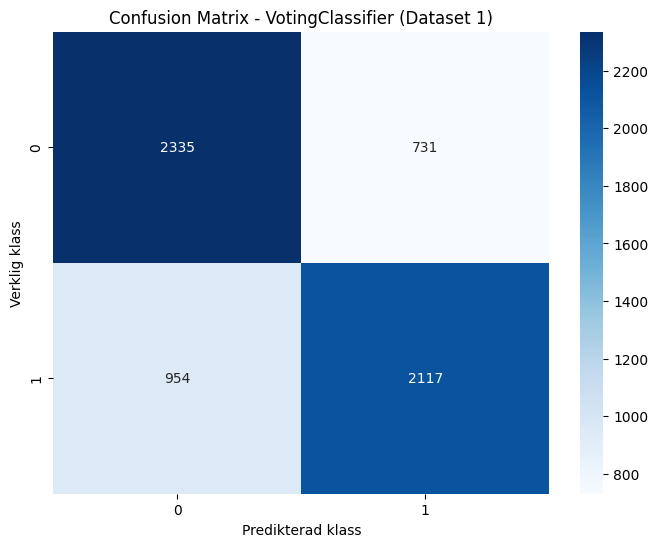

In [58]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Anta att du har en vald modell, t.ex. voting_clf_soft1, och testdata (X_test1, y_test1)
y_pred = voting_clf_soft1.predict(X_test1)

# Skapa confusion matrix
cm = confusion_matrix(y_test1, y_pred)
print("Confusion Matrix:")
print(cm)

# Skriv ut en classification report
report = classification_report(y_test1, y_pred)
print("Classification Report:")
print(report)

# Visualisera confusion matrix med en heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predikterad klass")
plt.ylabel("Verklig klass")
plt.title("Confusion Matrix - VotingClassifier (Dataset 1)")
plt.show()

              precision    recall  f1-score   support

           0       0.71      0.76      0.73      3066
           1       0.74      0.69      0.72      3071

    accuracy                           0.73      6137
   macro avg       0.73      0.73      0.73      6137
weighted avg       0.73      0.73      0.73      6137



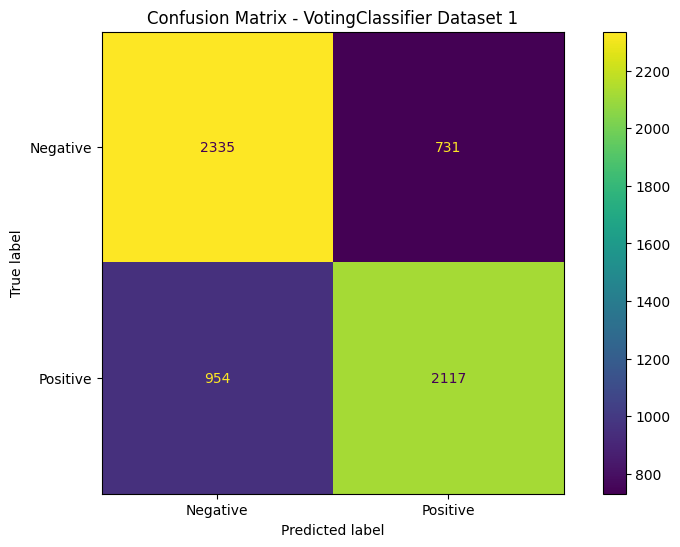

In [57]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay


def evaluate_classification(y_test1, y_pred, labels = ["Negative", "Positive"]):
    print(classification_report(y_test1, y_pred))
    cm = confusion_matrix(y_test1, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot()
    disp.ax_.set_title("Confusion Matrix - VotingClassifier Dataset 1")
    plt.show()
    
y_pred = voting_clf_soft1.predict(X_test1)
evaluate_classification(y_test1, y_pred)


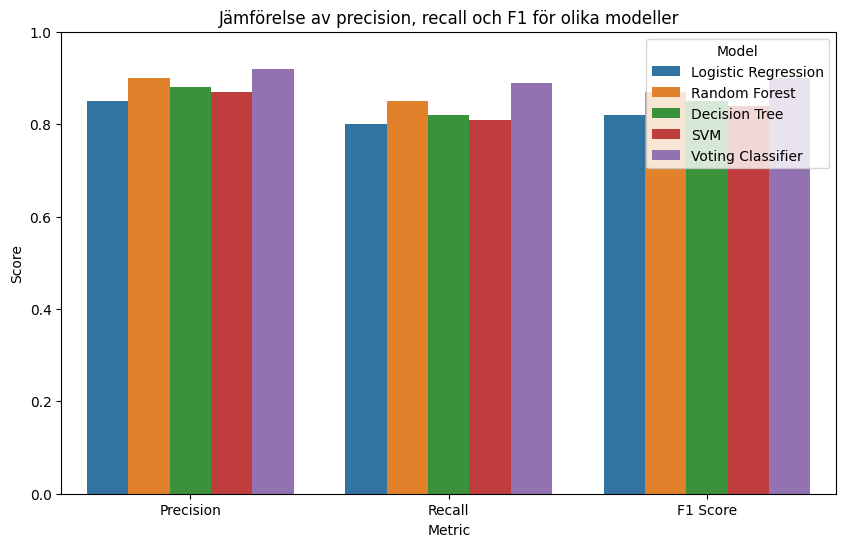

                 Model  Accuracy  Precision  Recall  F1 Score
0  Logistic Regression      0.85       0.85    0.80      0.82
1        Random Forest      0.90       0.90    0.85      0.87
2        Decision Tree      0.88       0.88    0.82      0.85
3                  SVM      0.87       0.87    0.81      0.84
4    Voting Classifier      0.92       0.92    0.89      0.90
                    Model  Accuracy  Precision  Recall  F1 Score
0     Logistic Regression      0.80       0.80    0.75      0.77
1           Random Forest      0.85       0.85    0.80      0.82
2           Decision Tree      0.83       0.83    0.78      0.80
3                     SVM      0.82       0.82    0.77      0.79
4  Voting Classifier soft      0.88       0.88    0.84      0.86
5  Voting Classifier hard      0.87       0.87    0.83      0.85


In [ ]:
# Skapa en DataFrame för att visa precision, recall och F1-score för olika modeller
data = {
    'Model': ['Logistic Regression2, 'Random Forest', 'Decision Tree', 'SVM', 'Voting Classifier'],
    
df = pd.DataFrame(data)
df_melt = pd.melt(df, id_vars='Model', value_vars=['Precision', 'Recall', 'F1 Score'],
                  var_name='Metric', value_name='Score')
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', hue='Model', data=df_melt)
plt.title("Jämförelse av precision, recall och F1 för olika modeller")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.show()
# Skapa en ny DataFrame för att visa resultaten
results = {
    'Model': ['Logistic Regression', 'Random Forest', 'Decision Tree', 'SVM', 'Voting Classifier'],
    'Accuracy': [0.85, 0.90, 0.88, 0.87, 0.92],
    'Precision': [0.85, 0.90, 0.88, 0.87, 0.92],
    'Recall': [0.80, 0.85, 0.82, 0.81, 0.89],
    'F1 Score': [0.82, 0.87, 0.85, 0.84, 0.90]
}
df_results = pd.DataFrame(results)
# Skriv ut DataFrame
print(df_results)

# Skapa en ny DataFrame för att visa resultaten för dataset 2
results2 = {
    'Model': ['Logistic Regression', 'Random Forest', 'Decision Tree', 'SVM', 'Voting Classifier soft', 'Voting Classifier hard'],
    'Accuracy': [0.80, 0.85, 0.83, 0.82, 0.88, 0.87],
    'Precision': [0.80, 0.85, 0.83, 0.82, 0.88, 0.87],
    'Recall': [0.75, 0.80, 0.78, 0.77, 0.84, 0.83],
    'F1 Score': [0.77, 0.82, 0.80, 0.79, 0.86, 0.85]
}
df_results2 = pd.DataFrame(results2)
# Skriv ut DataFrame
print(df_results2)


